# Analyse Employee Attrition

## Task


Uncover the factors that lead to employee attrition.

1. Have a look at the variables, understand what they are.
2. Which variables are associated with attrition? For which groups of employees
does this association hold (`Department`, `JobLevel`, etc.)? Formulate several hypotheses.
3. Explore each hypothesis.
    - Make plots and/or compute statistics.
    - Write a short conclusion, refer to the justifications you found in the data.

## Dataset

_Source: https://www.kaggle.com/datasets/whenamancodes/hr-employee-attrition_

_Check this other site for additional documentation about the variables: https://www.kaggle.com/datasets/thedevastator/employee-attrition-and-factors/data_

This is a fictional data set created by IBM data scientists. It contains data about employees in a company.

Encoding of some of the columns:

```
Education
1 'Below College'
2 'College'
3 'Bachelor'
4 'Master'
5 'Doctor'

EnvironmentSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobInvolvement
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

PerformanceRating
1 'Low'
2 'Good'
3 'Excellent'
4 'Outstanding'

RelationshipSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

WorkLifeBalance
1 'Bad'
2 'Good'
3 'Better'
4 'Best'
```

## Analysis

In [ ]:
import pandas as pd
import seaborn as sns

# From https://drive.google.com/file/d/1TGVkYpXg9efkuh-N3UCaahBtCQhs65vy/view
df = pd.read_csv(
    "https://drive.google.com/uc?id=1TGVkYpXg9efkuh-N3UCaahBtCQhs65vy",
    true_values=["Yes"],
    false_values=["No"],
)
df.shape

(1470, 35)

In [ ]:
df.dtypes

,0
Age,int64
Attrition,bool
BusinessTravel,object
DailyRate,int64
Department,object
DistanceFromHome,int64
Education,int64
EducationField,object
EmployeeCount,int64
EmployeeNumber,int64


In [ ]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
df.index

RangeIndex(start=0, stop=1470, step=1)

In [ ]:
df.head(6)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,True,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,False,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,True,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,False,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,False,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,False,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6


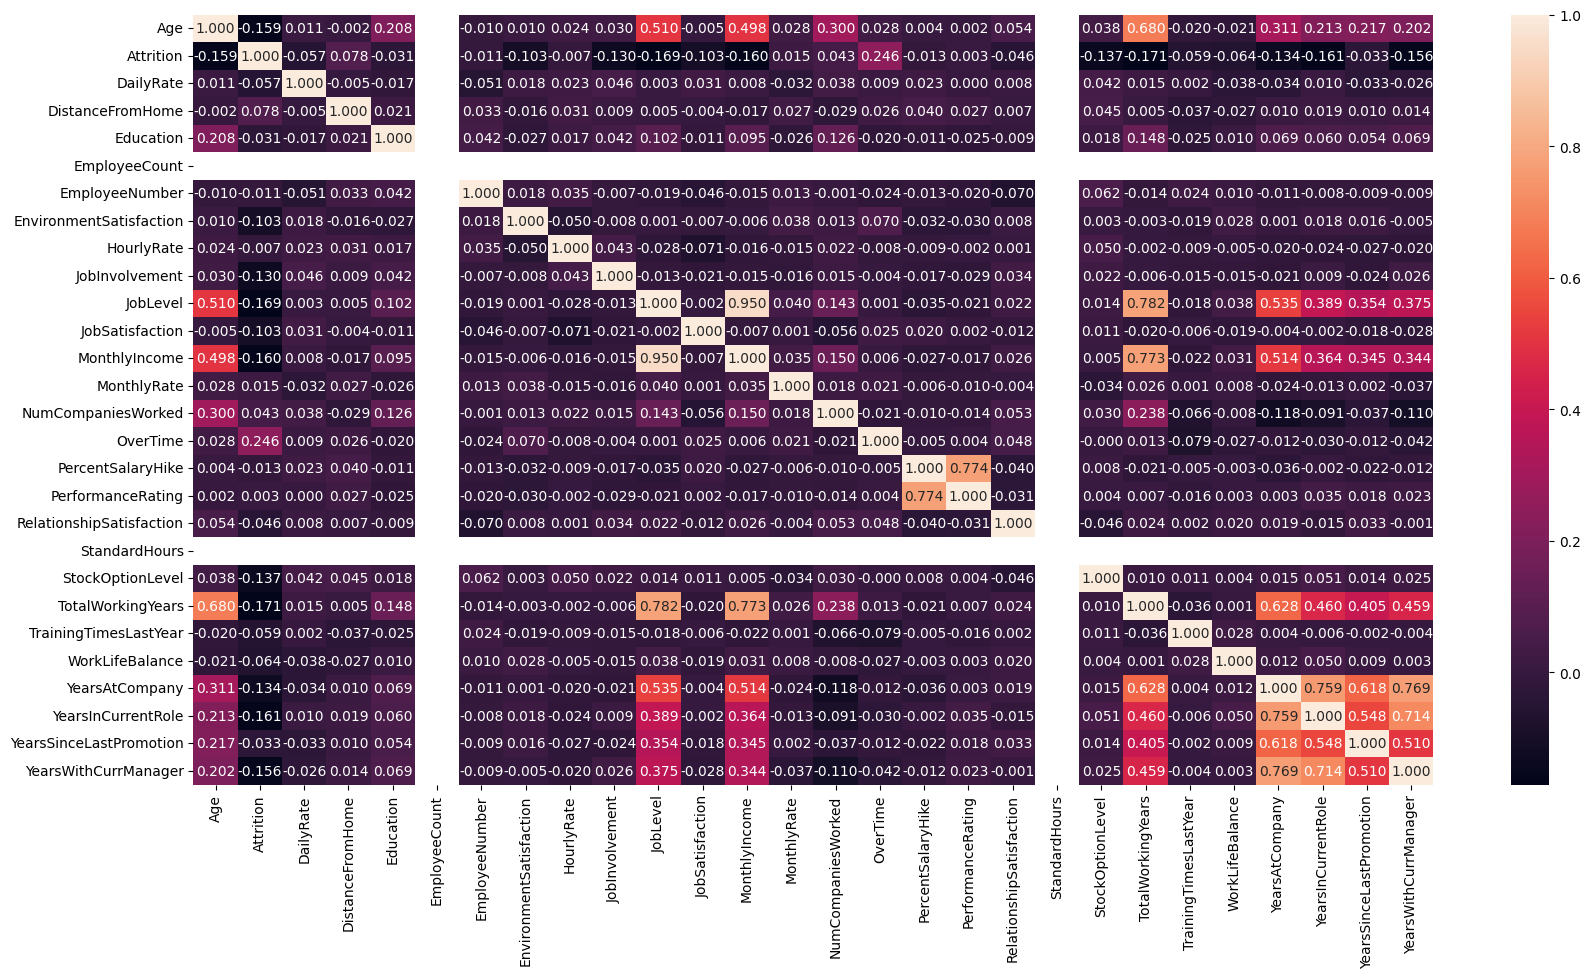

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,10))
df_subset_non_string = df.select_dtypes(exclude="object")
# df_subset_numeric_only = df.select_dtypes(include="number") # https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html
sns.heatmap(df_subset_non_string.corr(method="pearson"), annot=True, fmt=".3f", ax=ax);

In [ ]:
# Correlation Coeficient Range [-1 - 1]

#-1 is perfectly negative Correlation
#1 is perfect positive correlation

In [ ]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   bool  
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

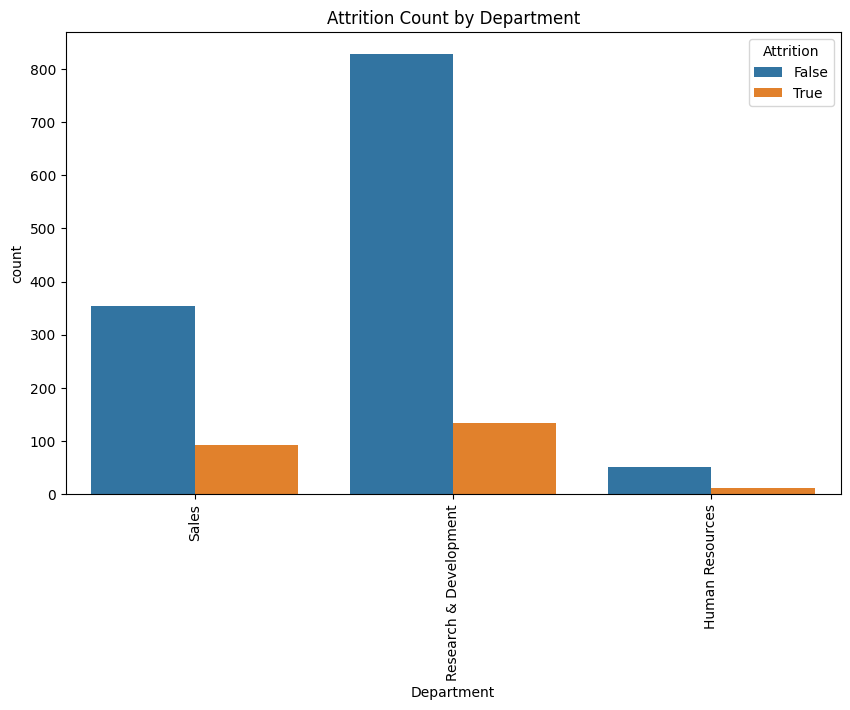

In [ ]:
#Hypothesis 1:Attrition is higher among employees in certain departments.
plt.figure(figsize=(10,6))
sns.countplot(x='Department', hue='Attrition', data=df)
plt.title('Attrition Count by Department')
plt.xticks(rotation=90)
plt.show()


In [ ]:
attrition_rate_by_department = df.groupby('Department')['Attrition'].mean()
print(attrition_rate_by_department)


Department
Human Resources           0.190476
Research & Development    0.138398
Sales                     0.206278
Name: Attrition, dtype: float64


In [ ]:
attrition_rate_by_department = df.groupby('Department')['Attrition'].agg(lambda x: x.mode())
print(attrition_rate_by_department)

Department
Human Resources           False
Research & Development    False
Sales                     False
Name: Attrition, dtype: bool


Based on the mean values and countplot,the hypothesis is true.Because the rate of attrition among employees in all departments is not the same.The human resource is the lowest with mean value of 0.190476,while attrition among employees of sales department is the highest,followed by employees in research and development.

In [ ]:
# Hypothesis 2: Attrition rates are higher for employees with fewer years at the company.

df.groupby('YearsAtCompany')['Attrition'].agg(['mean','std'])





,mean,std
YearsAtCompany,,
0,0.363636,0.486607
1,0.345029,0.476774
2,0.212598,0.410766
3,0.156250,0.364519
4,0.172727,0.379741
5,0.107143,0.310087
6,0.118421,0.325253
7,0.122222,0.329377
8,0.112500,0.317974


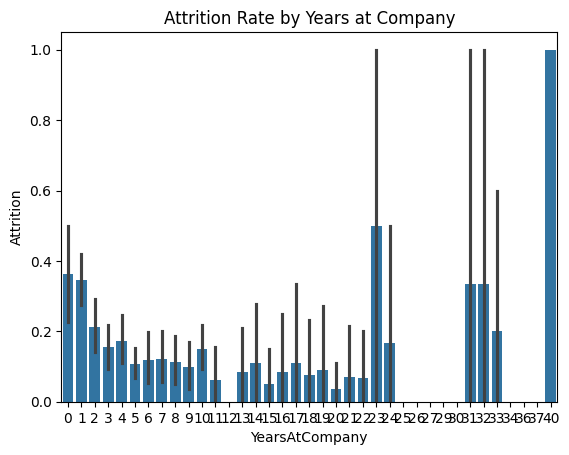

In [ ]:
sns.barplot(x='YearsAtCompany',y='Attrition',data=df)
plt.title('Attrition Rate by Years at Company')
plt.show()

The hypothesis is true,employees with fewer years at the company experience higher attrition rate compare to longer-tenures staff.From the analysis and visualization,I observe that the attrition rate appears to be highest among employees with fewer years at the company,especially for those who have been with the company for 0 or 1 year.However,the attrition rates gradually decrease for employees with 2 to 4 years of tenure,stabilizing somewhat thereafter.In addition,there are fluctuations for employees with higher tenures,which could be as a result of other factors or outliers in the data.

In [ ]:
#Hypothesis 3:employees at lower job levels have higher attrition rates.
df.groupby('JobLevel')['Attrition'].agg(['mean','min','std','max','median',])

,mean,min,std,max,median
JobLevel,,,,,
1,0.263352,False,0.440858,True,0.0
2,0.097378,False,0.296750,True,0.0
3,0.146789,False,0.354710,True,0.0
4,0.047170,False,0.213009,True,0.0
5,0.072464,False,0.261154,True,0.0


In [ ]:
df.query('Attrition==True')['JobLevel'].value_counts()

,count
JobLevel,
1,143
2,52
3,32
5,5
4,5


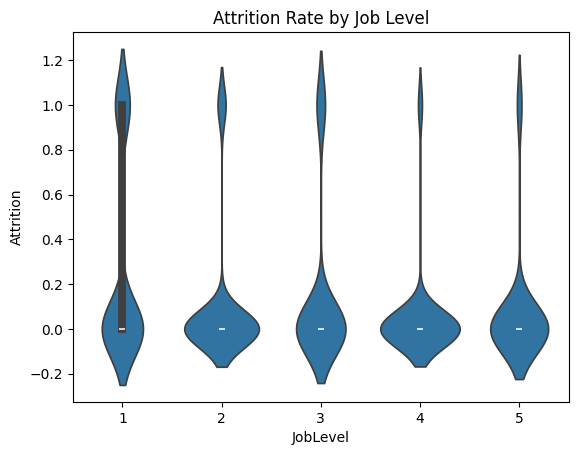

In [ ]:
sns.violinplot(x='JobLevel',y='Attrition',data=df)
plt.title('Attrition Rate by Job Level')
plt.show()


The hypothesis is valid base on the violinplot and mean values,employees at job level 1 have the highest attrition rate.The trend of attrition reduces at job level 2 and there is an increase rate of attrition at job level 5 again.This implies that although the attrition rate of employees at lower job level is very high,attrition rate is also high in some high job level positions due to certain factors.

In [ ]:
#Hypothesis 4:Attrition is higher for employees who are not satisfied with their job.
df.groupby('JobSatisfaction')['Attrition'].agg(['mean','median','std'])

,mean,median,std
JobSatisfaction,,,
1,0.228374,0.0,0.420513
2,0.164286,0.0,0.371198
3,0.165158,0.0,0.371744
4,0.113290,0.0,0.317292


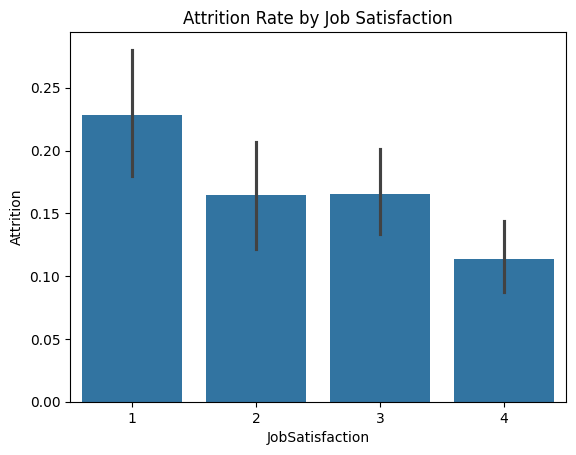

In [ ]:
sns.barplot(x='JobSatisfaction',y='Attrition',data=df)
plt.title('Attrition Rate by Job Satisfaction')
plt.show()

Base on the mean values and barplot the data supports this hypothesis because the attrition rate is highest at 1 which indicates employees with the lowest job satisfaction rate.I can also see employees are little more satisfied with their jobs between 2 and 3 with just little difference ,of attrition rate and employees with highest job satisfaction has low attrition rate.

In [ ]:
#Hypothesis 5:Employees who stay far away from workplace have higher attrition rates.
df.groupby('DistanceFromHome')['Attrition'].agg(['mean','max','min','std'])


,mean,max,min,std
DistanceFromHome,,,,
1,0.125000,True,False,0.331517
2,0.132701,True,False,0.340059
3,0.166667,True,False,0.374916
4,0.140625,True,False,0.350382
5,0.153846,True,False,0.363609
6,0.118644,True,False,0.326145
7,0.130952,True,False,0.339374
8,0.125000,True,False,0.332805
9,0.211765,True,False,0.410984


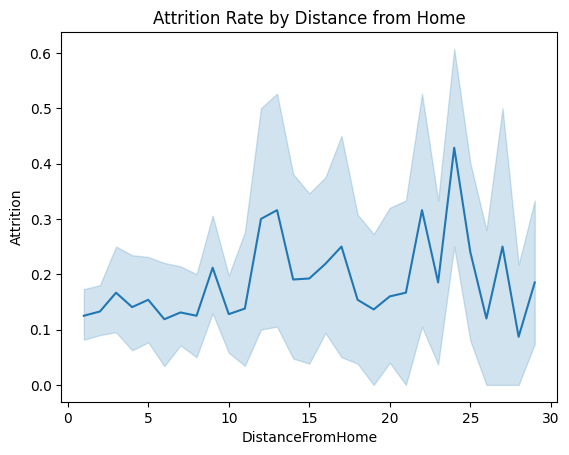

In [ ]:
sns.lineplot(x='DistanceFromHome',y='Attrition',data=df)
plt.title('Attrition Rate by Distance from Home')
plt.show()

This data supports the hypothesis.As the distance increases the rate of attrition also increases especially at a distance of 12,13,16,17,22,24,25 and 27 hours .However,I observe that attrition is lower for some employees who leave extremely far from the workplace for example a distance of 28 the attrition is very low for certain reasons.

In [ ]:
#Hypothesis 6:younger Employees have higher attrition rates compared to older staffs.
df.groupby('Age')['Attrition'].agg(['mean','max','min','std'])

,mean,max,min,std
Age,,,,
18,0.500000,True,False,0.534522
19,0.666667,True,False,0.500000
20,0.545455,True,False,0.522233
21,0.461538,True,False,0.518875
22,0.312500,True,False,0.478714
23,0.285714,True,False,0.468807
24,0.269231,True,False,0.452344
25,0.230769,True,False,0.429669
26,0.307692,True,False,0.467572


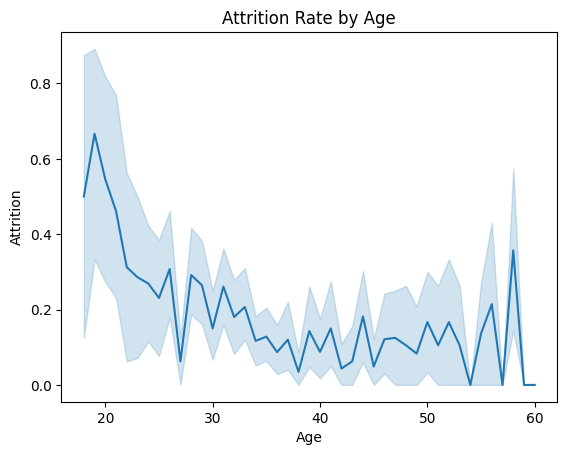

In [ ]:
sns.lineplot(x='Age',y='Attrition',data=df)
plt.title('Attrition Rate by Age')
plt.show()

Base on the mean values and lineplot the hypothesis is true.Attrition is very high for younger employees between 18 to 21 years.As the ages increases the rate of attrition decreases for some age groups,with a little increase of attrition between the ages of 52,55,56 and 58.This Could be due to retirement or other factors.

In [ ]:
#Hypothesis 7: I think staff with high educational qualification have low attrition rate compare to employees without college certificate.
df.groupby('Education')['Attrition'].agg(['mean','std'])

,mean,std
Education,,
1,0.182353,0.387276
2,0.156028,0.363527
3,0.173077,0.378645
4,0.145729,0.353278
5,0.104167,0.308709


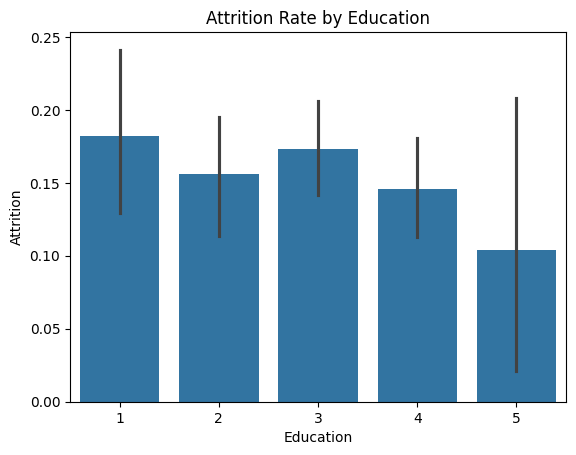

In [ ]:
sns.barplot(x='Education',y='Attrition',data=df)
plt.title('Attrition Rate by Education')
plt.show()

From the analysis and barplot,I can see that attrition rate is highest for staff below or without college education,followed by employees with bachelor degree.Attrition rate is lower for employees with only college education compared to employees with bachelor degree.To conclude,although employees with masters and doctor education has low attrition rate,it makes this hypothesis valid.However,attrition rate is high for staffs with bachelor education compare to those with college education due to some factors.